In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('http://taanila.fi/data1.xlsx' , sheetname = 'Data')
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [3]:
koulutus = ['Peruskoulu' , '2. aste' , 'Korkeakoulu' , 'Ylempi korkeakoulu']
perhe = ['Perheetön' , 'Perheellinen']
Sukup = ['Mies' , 'Nainen']
Tyytyväisyys = ['Erittäin tyytymätön' , 'Jokseenkin tyytymätön', 'Ei tyytymätön eikä tyytyväinen' , 'Jokseenkin tyytyväinen' ,
               'Erittäin tyytyväinen']

In [7]:
df1 = pd.crosstab(df['koulutus'], 'lkm')
df1.index = koulutus
df1.columns.name = ''
df1

,lkm
Peruskoulu,27
2. aste,30
Korkeakoulu,22
Ylempi korkeakoulu,2


In [10]:
df1['%'] = df1/df1.sum()
df1.style.format({'%' : '{:.1%}'})

,lkm,%
Peruskoulu,27,33.3%
2. aste,30,37.0%
Korkeakoulu,22,27.2%
Ylempi korkeakoulu,2,2.5%


[Text(0,0,'0%'),
 Text(0,0,'5%'),
 Text(0,0,'10%'),
 Text(0,0,'15%'),
 Text(0,0,'20%'),
 Text(0,0,'25%'),
 Text(0,0,'30%'),
 Text(0,0,'35%'),
 Text(0,0,'40%')]

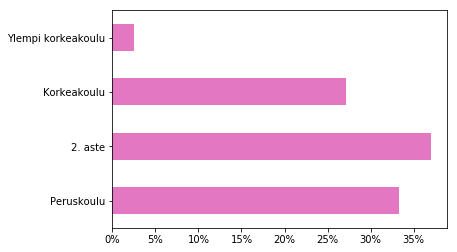

In [19]:
ax = df1['%'].plot.barh(color = 'C6')
vals = ax.get_xticks()
ax.set_xticklabels(['{:.0%}'.format(x) for x in vals])

In [16]:
df2 = df[['työterv', 'lomaosa', 'kuntosa', 'hieroja']].count()
df2 = df2.to_frame('lkm').sort_values(by='lkm', ascending=False)
df2

,lkm
,
työterv,47
hieroja,22
lomaosa,20
kuntosa,9


Text(0.5,0,'Käyttäjien lukumäärä')

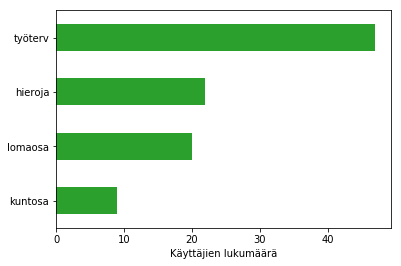

In [21]:
df2.sort_values(by='lkm').plot.barh(legend=False, color='C2')
plt.xlabel('Käyttäjien lukumäärä')

In [24]:
df3 = df.groupby('sukup')['työterv', 'lomaosa', 'kuntosa', 'hieroja'].count()
df3.index = Sukup
df3

,työterv,lomaosa,kuntosa,hieroja
Mies,35,16,8,13
Nainen,12,4,1,9


Text(0.5,0,'käyttäjien lkm')

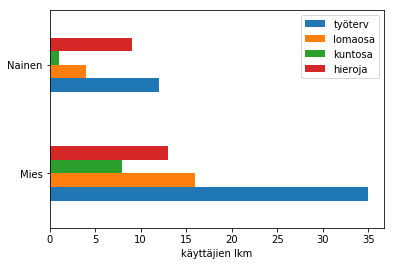

In [27]:
df3.plot.barh()
plt.xlabel('käyttäjien lkm')

In [28]:
dfn=df.groupby('sukup')['koulutus'].count()
dfn

sukup
1    62
2    19
Name: koulutus, dtype: int64

In [40]:
df4 = pd.crosstab(df['koulutus'], df['sukup'], normalize='columns')
df4.index = koulutus
mies = 'mies (n='+str(dfn[1])+')'
nainen = 'nainen (n='+str(dfn[2])+')'
df4.columns = [mies, nainen] 
df4.style.format('{:.1%}')

,mies (n=62),nainen (n=19)
Peruskoulu,35.5%,26.3%
2. aste,37.1%,36.8%
Korkeakoulu,24.2%,36.8%
Ylempi korkeakoulu,3.2%,0.0%


Text(0.5,0,'prosenttia sukupuolesta')

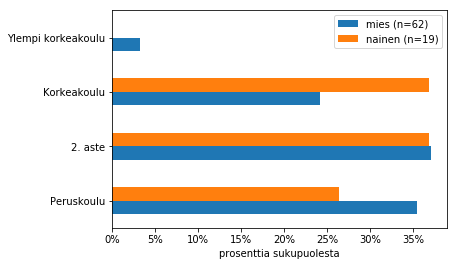

In [43]:
ax = df4.plot.barh()
vals = ax.get_xticks()
ax.set_xticklabels(['{:.0%}'.format(x) for x in vals])
plt.xlabel('prosenttia sukupuolesta')

In [47]:
df5 = df['johto'].value_counts(sort = False, normalize = True).to_frame()
df5['työtov'] = df['työtov'].value_counts(sort = False, normalize = True)
df5['työymp'] = df['työymp'].value_counts(sort = False, normalize = True)
df5['palkkat'] = df['palkkat'].value_counts(sort = False, normalize = True)
df5['työteht'] = df['työteht'].value_counts(sort = False, normalize = True)
df5.index = Tyytyväisyys
df5.style.format('{:.1%}')

,johto,työtov,työymp,palkkat,työteht
Erittäin tyytymätön,8.5%,nan%,11.0%,40.2%,6.1%
Jokseenkin tyytymätön,19.5%,3.7%,11.0%,23.2%,18.3%
Ei tyytymätön eikä tyytyväinen,36.6%,19.8%,36.6%,23.2%,35.4%
Jokseenkin tyytyväinen,28.0%,43.2%,28.0%,12.2%,30.5%
Erittäin tyytyväinen,7.3%,33.3%,13.4%,1.2%,9.8%


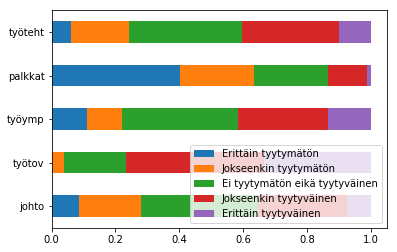

In [48]:
ax = df5.transpose().plot.barh(stacked = True)

In [50]:
bins = [1000, 2000, 3000, 4000, 7000]
df['palkkaluokka'] = pd.cut(df['palkka'], bins=bins)
dtf6 = pd.crosstab(df['palkkaluokka'], 'lkm')
dtf6.columns.name = ''
dtf6

,lkm
palkkaluokka,
"(1000, 2000]",19
"(2000, 3000]",50
"(3000, 4000]",8
"(4000, 7000]",5


Text(0,0.5,'lukumäärä')

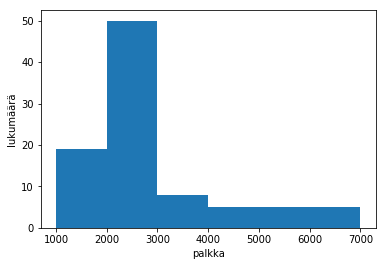

In [51]:
df['palkka'].plot.hist(bins)
plt.xlabel('palkka')
plt.ylabel('lukumäärä')